In [1]:
import keras


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
# ((訓練x, 訓練y), (測試x, 測試y))
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (60000, 28, 28)
測試的維度: (10000, 28, 28)


標籤: 7


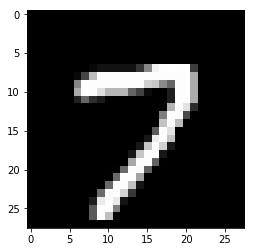

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("標籤:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,7,18,...,255,254,254,61,0,0,0,0,0,0
8,0,0,0,0,0,0,8,69,189,253,...,253,253,253,170,0,0,0,0,0,0
9,0,0,0,0,0,0,133,253,253,253,...,102,253,253,170,0,0,0,0,0,0


In [6]:
# normalize: (0~1)(-1~1)
# 除以 255 讓我們標準化到 0-1 區間
# 帶進去mlp前一定要攤平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# keras 要求你的分類輸出必須換成 One-hot 模式，目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 第一層一定要帶input_dim
model.add(Dense(input_dim=784, units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = model.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.4343 - acc: 0.8814 - val_loss: 0.1885 - val_acc: 0.9490
Epoch 2/10
 - 1s - loss: 0.2006 - acc: 0.9428 - val_loss: 0.1441 - val_acc: 0.9612
Epoch 3/10
 - 1s - loss: 0.1478 - acc: 0.9576 - val_loss: 0.1142 - val_acc: 0.9702
Epoch 4/10
 - 1s - loss: 0.1158 - acc: 0.9673 - val_loss: 0.0991 - val_acc: 0.9730
Epoch 5/10
 - 1s - loss: 0.0939 - acc: 0.9736 - val_loss: 0.0895 - val_acc: 0.9738
Epoch 6/10
 - 1s - loss: 0.0780 - acc: 0.9786 - val_loss: 0.0837 - val_acc: 0.9757
Epoch 7/10
 - 1s - loss: 0.0663 - acc: 0.9816 - val_loss: 0.0788 - val_acc: 0.9772
Epoch 8/10
 - 1s - loss: 0.0573 - acc: 0.9841 - val_loss: 0.0779 - val_acc: 0.9778
Epoch 9/10
 - 1s - loss: 0.0493 - acc: 0.9864 - val_loss: 0.0729 - val_acc: 0.9792
Epoch 10/10
 - 1s - loss: 0.0428 - acc: 0.9887 - val_loss: 0.0785 - val_acc: 0.9753


In [10]:
model.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 0s 16us/step


[0.07405610520914196, 0.9765]

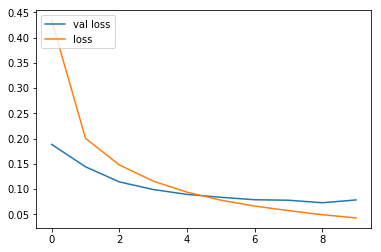

In [11]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [12]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(model.predict_classes(x_test_shape), y_test))

,0,1,2,3,4,5,6,7,8,9
0,965,0,4,0,1,2,3,0,0,2
1,0,1123,1,0,0,0,3,5,0,3
2,2,4,1003,5,5,0,2,10,1,0
3,1,0,0,979,0,7,1,5,3,4
4,0,0,1,0,954,1,2,0,2,8
5,1,2,0,8,0,868,3,0,5,2
6,7,2,2,1,5,7,940,0,2,0
7,0,0,6,4,2,1,0,996,3,5
8,3,4,13,8,2,4,4,3,954,2
9,1,0,2,5,13,2,0,9,4,983
